In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def h(v,w,x,y,z):
    def xor(a,b):
        return 1 if a == b else -1
    def _or(a,b):
        return 1 if a == 1 and b == 1 else -1
    return _or(xor(_or(xor(v,w), x), y),xor(y,z))

In [7]:
sel = [-1, 1]
train = np.zeros((32,6))
result = np.zeros((32,1))
#print("v  w  x  y  z  f")
idx = 0
for v in sel:
    for w in sel:
        for x in sel:
            for y in sel:
                for z in sel:
                    inputs = [v,w,x,y,z]
                    output = h(v,w,x,y,z)
                    #print(inputs, output)
                    train[idx] = [v,w,x,y,z,1]
                    result[idx] = output
                    idx += 1

In [29]:
weight = np.random.random((6,1)) # weights between -1 and 1

In [30]:
lr = 0.015
total_iter = 100
weights = np.zeros((total_iter, 6))
w1 = np.zeros((total_iter,1))
w2 = np.zeros((total_iter,1))
w3 = np.zeros((total_iter,1))
w4 = np.zeros((total_iter,1))
w5 = np.zeros((total_iter,1))
w6 = np.zeros((total_iter,1))
errors = []
acc = []
ct = 0

In [31]:
for i in range(total_iter):
    for j in range(len(train)):
        output = np.dot(train[j].T, weight)
        error = result[j] - output
        weight += lr*error*train[j].reshape(6,1)
    weights[i] = weight.reshape(1,6)
    w1[i] = weight[0]
    w2[i] = weight[1]
    w3[i] = weight[2]
    w4[i] = weight[3]
    w5[i] = weight[4]
    w6[i] = weight[5]
    ct = 0
    for i in range(len(train)):
        output = np.sign(np.dot(train[i], weight))
        if output != result[i]:
            ct += 1
    acc.append(ct)

In [23]:
# batch
for i in range(total_iter):
    output = np.matmul(train, weight)

    error = result - output.reshape(32,1)
    weight += np.matmul(train.T, error)*lr
    w1[i] = weight[0]
    w2[i] = weight[1]
    w3[i] = weight[2]
    w4[i] = weight[3]
    w5[i] = weight[4]
    w6[i] = weight[5]
    ct = 0
    for i in range(len(train)):
        output = np.sign(np.dot(train[i], weight))
        if output != result[i]:
            ct += 1
    acc.append(ct)

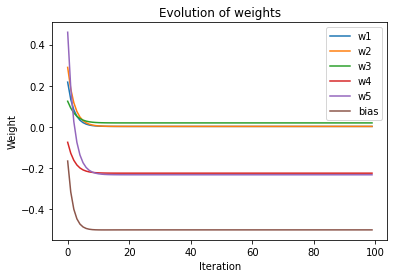

In [32]:
plt.plot( [i for i in range(total_iter)], w1, label = "w1")
plt.plot( [i for i in range(total_iter)], w2, label = "w2")
plt.plot( [i for i in range(total_iter)], w3, label = "w3")
plt.plot( [i for i in range(total_iter)], w4, label = "w4")
plt.plot( [i for i in range(total_iter)], w5, label = "w5")
plt.plot( [i for i in range(total_iter)], w6, label = "bias")
plt.xlabel('Iteration')
plt.ylabel('Weight')
# Set a title of the current axes.
plt.title('Evolution of weights')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [33]:
# MADALINE

In [34]:
def h(v,w,x,y,z):
    def xor(a,b):
        return 1 if a == b else -1
    def _or(a,b):
        return 1 if a == 1 and b == 1 else -1
    return _or(xor(_or(xor(v,w), x), y),xor(y,z))

In [36]:
sel = [-1, 1]
train = np.zeros((32,5))
result = np.zeros((32,1))
idx = 0
for v in sel:
    for w in sel:
        for x in sel:
            for y in sel:
                for z in sel:
                    inputs = [v,w,x,y,z]
                    output = h(v,w,x,y,z)
                    train[idx] = [v,w,x,y,z]
                    result[idx] = output
                    idx += 1

In [130]:
w1 = np.random.random((5,5))
b1 = np.random.random((5,1))
w2 = np.random.random((5,1))
b2 = np.random.random((1))

In [131]:
lr = 0.005
total_iter = 1000
errors = []
acc = []
ct = 0
hidden = np.zeros((5))
b11 = np.zeros(total_iter)
b21 = np.zeros(total_iter)

In [132]:
for i in range(total_iter):
    for j in range(len(train)):
        for k in range(5):
            hidden[k] = np.dot(train[j], w1[k]) + b1[k]
        yh = np.sign(np.matmul(np.sign(hidden),w2) + b2)
        
        # update
        w1 += 2*(result[j]-yh)*w2*train[j]*lr
        b1 += 2*(result[j]-yh)*w2*lr
        
        w2 += 2*(result[j]-yh)*hidden.reshape(5,1)*lr #-2(y-yh)*hidden
        b2 += 2*(result[j]-yh)*lr
    b21[i] = b2
    
    ct = 0
    for i in range(len(train)):
        yh = np.sign(np.matmul(np.sign(hidden),w2) + b2)
        if yh != result[i]:
            ct += 1
    acc.append(ct)
        

In [135]:
acc

[24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 8,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 

In [133]:
print(w1,w2,b1,b2)

[[ 0.04815798  0.15558025  0.0349667   0.0120491  -0.16902055]
 [ 0.18899392 -0.01533602  0.04005772  0.04855258 -0.09413014]
 [ 0.10574724  0.03188082 -0.02520887  0.04092504  0.01139316]
 [ 0.04287272 -0.00483607  0.03474897 -0.06629461  0.00347633]
 [-0.03571431 -0.02508242 -0.10856313  0.1711956   0.07882704]] [[ 0.04409049]
 [-0.01282368]
 [-0.03331699]
 [ 0.02611287]
 [-0.11037838]] [[ 0.03530623]
 [-0.01273147]
 [ 0.13833951]
 [ 0.06276405]
 [ 0.40401606]] [0.06225086]


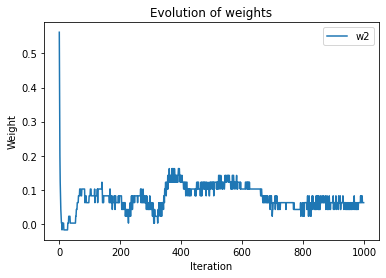

In [134]:
#plt.plot( [i for i in range(total_iter)], b11, label = "w1")
plt.plot( [i for i in range(total_iter)], b21, label = "w2")
# plt.plot( [i for i in range(total_iter)], w3, label = "w3")
# plt.plot( [i for i in range(total_iter)], w4, label = "w4")
# plt.plot( [i for i in range(total_iter)], w5, label = "w5")
plt.xlabel('Iteration')
plt.ylabel('Weight')
# Set a title of the current axes.
plt.title('Evolution of weights')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()